# Fully convective simulations: the impact of the initial condition

We start by trying to reproduce a simualtion performed by Thomas Gastine on its paper in 2012. For all simulations here we used constant entropy as the boundary condition for fluctuations. 
We define the convective region by seting a constant negative gradient in the background entropy profile, $\frac{dS}{dr} = -1$. 

In [2]:
import os 
from magic import *
FIGS_DIR = "/Volumes/LaCie/Report_Sims/figs/"
WORK_DIR = "/Volumes/LaCie/Simulations/mhd/"

# Sims w/ constant entropy at the boundaries:
SIM1 = WORK_DIR + 'Nr15Ek5Ra7dS200Pm5-FC_bs'
SIM2 = WORK_DIR + 'Nr15Ek5Ra7dS200Pm5-FC_bs_imposeDip'
SIM3 = WORK_DIR + 'Nr15Ek5Ra7dS200Pm5-FC_bs_init0'

# Name of figures
FIGNAME1 = 'dip_cmb_FC'
FIGNAME2 = 'ro_FC'


### Comparison between different approachs on case $Ra = 2.5 Ra_c$

- Sim1: Case started from previous progenitor with $Ra = 2.0 Ra_c$

In [3]:
os.chdir(SIM1)
ts1 = MagicTs(field='dipole', all=True, iplot=False)
rad1 = MagicRadial(field='parR', iplot=False)

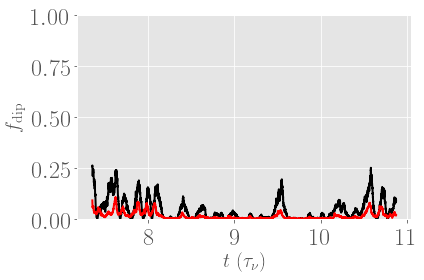

In [4]:
os.chdir(FIGS_DIR)
it1 = ts1.time.argsort()
plt.plot(ts1.time[it1], ts1.dip_cmb[it1], 'k')
plt.plot(ts1.time[it1], ts1.dipolarity[it1], 'r')
plt.ylabel(r'$f_\mathrm{dip}$', fontsize=20)
plt.xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
plt.ylim((0.,1.))
plt.tight_layout()
plt.savefig(FIGNAME1+'.png')
plt.show()

In [5]:
os.chdir(SIM2)
ts2 = MagicTs(field='dipole', all=True, iplot=False)
rad2 = MagicRadial(field='parR', iplot=False)

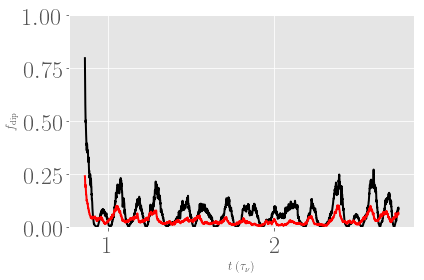

In [6]:
os.chdir(FIGS_DIR)
it2 = ts2.time.argsort()
plt.plot(ts2.time[it2], ts2.dip_cmb[it2], 'k')
plt.plot(ts2.time[it2], ts2.dipolarity[it2], 'r')

plt.ylabel(r'$f_\mathrm{dip}$')
plt.xlabel(r'$t \; (\tau_\nu)$')
plt.ylim((0.,1.))
plt.tight_layout()
plt.savefig(FIGNAME1+'d_restart.png')
plt.show()

In [7]:
os.chdir(SIM3)
ts3 = MagicTs(field='dipole', all=True, iplot=False)
rad3 = MagicRadial(field='parR', iplot=False)

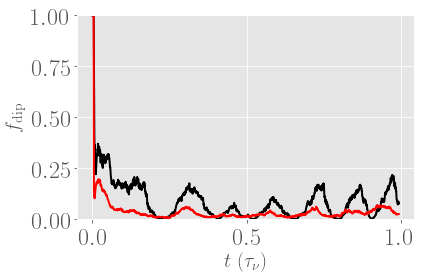

In [8]:
os.chdir(FIGS_DIR)
it3 = ts3.time.argsort()
plt.plot(ts3.time[it3], ts3.dip_cmb[it3], 'k')
plt.plot(ts3.time[it3], ts3.dipolarity[it3], 'r')
plt.ylabel(r'$f_\mathrm{dip}$', fontsize=20)
plt.xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
plt.ylim((0.,1.))
plt.tight_layout()
plt.savefig(FIGNAME1+'d.png')
plt.show()

In [9]:
itc = ts3.time > 0.5
ts3.dip_cmb[itc].mean()

0.06876672365027732

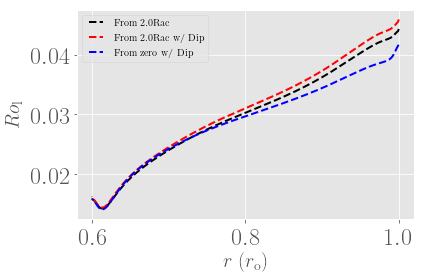

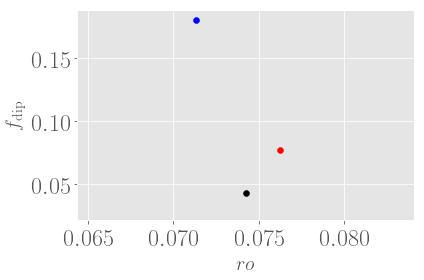

In [10]:
os.chdir(FIGS_DIR)
plt.plot(rad1.radius, rad1.urol, '--k', label='From 2.0Rac')
plt.plot(rad2.radius, rad2.urol, '--r', label='From 2.0Rac w/ Dip')
plt.plot(rad3.radius, rad3.urol, '--b', label='From zero w/ Dip')
plt.ylabel(r'$Ro_\mathrm{l}$', fontsize=20)
plt.xlabel(r'$r \; (r_\mathrm{o})$', fontsize=20)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig(FIGNAME2+'.png')
plt.show()

scal = 0.4
plt.scatter(rad1.urol.mean()/scal, ts1.dip_cmb.mean(), color='k')
plt.scatter(rad2.urol.mean()/scal, ts2.dip_cmb.mean(), color='r')
plt.scatter(rad3.urol.mean()/scal, ts3.dip_cmb.mean(), color='b')
plt.ylabel(r'$f_\mathrm{dip}$', fontsize=20)
plt.xlabel(r'$ro$', fontsize=20)
plt.tight_layout()
plt.savefig(FIGNAME2+'.png')
plt.show()